<div style="text-align: right">INFO 6106 Machine Learning Final Project Help</div>
<div style="text-align: right">Dino Konstantopoulos 25 March 2024</div>

# Traverse City

We attempt to verify that cloud sequences are contiguous

In [3]:
import os
import pandas as pd
import numpy as np
import pickle
import ast
from tqdm import tqdm
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import cv2
%matplotlib inline

I think this is just winter months:

In [4]:
les = pd.read_csv(r'./Data/2006Fall_2017Spring_GOES_meteo_combined.csv')
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


# EDA

In [5]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [6]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [7]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

#### Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values

In [8]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [9]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,2941,0.065095
File_name_for_2D_lake,2941,0.065095
Lake_data_1D,0,0.000000
Lake_data_2D,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991


Dropping null values:

In [10]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  44942


>**Note to self**: Next run, replace NA with 0 because we may actually have erased too many records by dropping NAs...

#### Changing Datatype

In [11]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               44942 non-null  object
 1   Time_UTC               44942 non-null  object
 2   Date_CST               44942 non-null  object
 3   Time_CST               44942 non-null  object
 4   File_name_for_1D_lake  44942 non-null  object
 5   File_name_for_2D_lake  44942 non-null  object
 6   Lake_data_1D           44942 non-null  object
 7   Lake_data_2D           44942 non-null  object
 8   Temp_F                 44942 non-null  object
 9   RH_pct                 44942 non-null  object
 10  Dewpt_F                44942 non-null  object
 11  Wind_Spd_mph           44942 non-null  object
 12  Wind_Direction_deg     44942 non-null  object
 13  Peak_Wind_Gust_mph     44942 non-null  object
 14  Low_Cloud_Ht_ft        44942 non-null  object
 15  Med_Cloud_Ht_ft        4

In [12]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [13]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               44942 non-null  object 
 1   Time_UTC               44942 non-null  object 
 2   Date_CST               44942 non-null  object 
 3   Time_CST               44942 non-null  object 
 4   File_name_for_1D_lake  44942 non-null  object 
 5   File_name_for_2D_lake  44942 non-null  object 
 6   Lake_data_1D           44942 non-null  object 
 7   Lake_data_2D           44942 non-null  object 
 8   Temp_F                 44942 non-null  float64
 9   RH_pct                 44942 non-null  float64
 10  Dewpt_F                44942 non-null  float64
 11  Wind_Spd_mph           44942 non-null  int64  
 12  Wind_Direction_deg     44942 non-null  int64  
 13  Peak_Wind_Gust_mph     44942 non-null  int64  
 14  Low_Cloud_Ht_ft        44942 non-null  int64  
 15  Med_Clo

#### Dropping data for the night-time
We focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

`14:00 UTC is 10:00am EST and 21:00 UTC is 5:00pm EST.`

In [14]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,20,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,330,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,310,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0


In [15]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


In [16]:
# Summary
filtered_les.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


In [17]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  22


## Adding the rain column to classify the rain as none, moderate, medium, high

In [18]:
filtered_les['rain'] = 'NONE'

In [19]:
for i,row in filtered_les.iterrows():
    if row['Precip_in'] > 0.0 and row['Precip_in'] < 0.03:
        filtered_les.at[i, 'rain'] = 'moderate'
    elif row['Precip_in'] >= 0.03 and row['Precip_in'] < 0.3:
        filtered_les.at[i, 'rain'] = 'medium'
    elif row['Precip_in'] >= 0.3:
        filtered_les.at[i, 'rain'] = 'high'
    else:
        filtered_les.at[i, 'rain'] = 'none'

In [20]:
rows_with_moderate_rainfall = filtered_les[filtered_les['rain'] == 'moderate']
rows_with_medium_rainfall = filtered_les[filtered_les['rain'] == 'medium']
rows_with_high_rainfall = filtered_les[filtered_les['rain'] == 'high']
rows_with_none_rainfall = filtered_les[filtered_les['rain'] == 'none']


In [21]:
print(rows_with_moderate_rainfall.shape[0])
print(rows_with_medium_rainfall.shape[0])
print(rows_with_high_rainfall.shape[0])
print(rows_with_none_rainfall.shape[0])

658
397
6
13890


In [22]:
print(rows_with_moderate_rainfall.shape[0] + rows_with_medium_rainfall.shape[0] + rows_with_high_rainfall.shape[0] + rows_with_none_rainfall.shape[0])

14951


In [23]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

# Cloud Imagery

In [24]:
def arrays_2_png(lat, lon, val, fig_name, rainfall):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig(r'./Images/lake-michigan-images/' + rainfall + '/' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [25]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'./Data/lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [26]:
df_lat_lon.shape

(3599, 2)

In [27]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [28]:
data_sample = filtered_les['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [29]:
data_sample2 = filtered_les['Lake_data_2D'][16]
data_sample2

'[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              n

# 1D data conversion 

In [30]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [31]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [32]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [33]:
data_sample_lst2 = [float(el) for el in filtered_les['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [34]:
data_sample_lst == data_sample_lst2

True

# Plotting 1D data

0

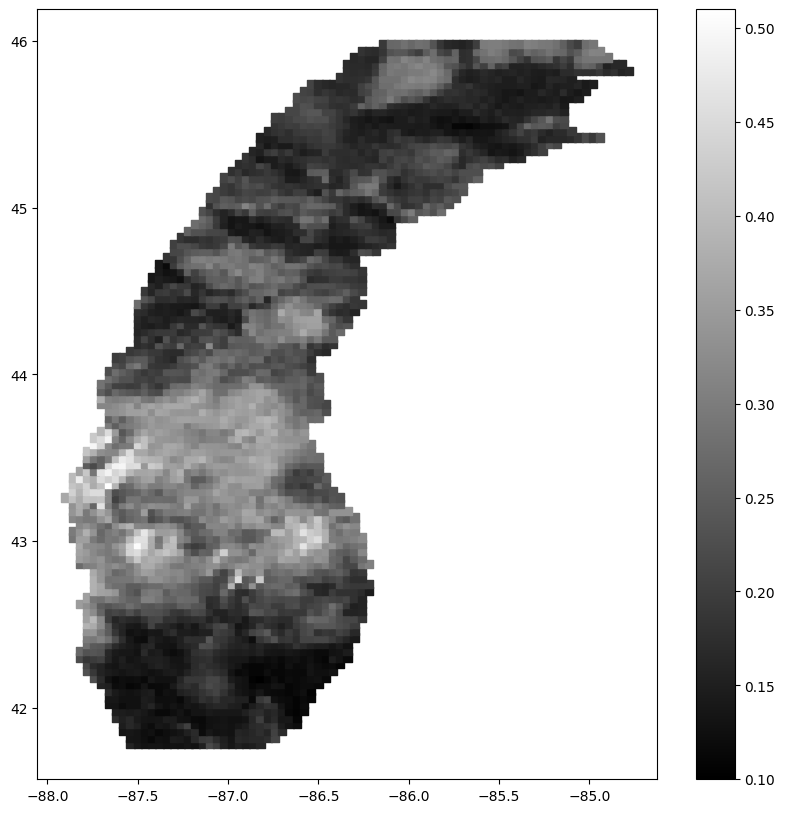

In [35]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample', 'none')

# goes11.2008.11.03.1600

In [34]:
filtered_les.loc[5177]

Date_UTC                                                        2008-01-18
Time_UTC                                                             15:00
Date_CST                                                        2008-01-18
Time_CST                                                             15:00
File_name_for_1D_lake            goes11.2008.01.18.1500.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.18.1500.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.0525, 0.055, 0.06, 0.0425, 0.06, 0.055, 0.0...
Lake_data_2D             [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...
Temp_F                                                                20.0
RH_pct                                                                77.0
Dewpt_F                                                               14.0
Wind_Spd_mph                                                            11
Wind_Direction_deg                                                     250
Peak_Wind_Gust_mph       

In [35]:
filtered_les.loc[5177]['rain']

'none'

0

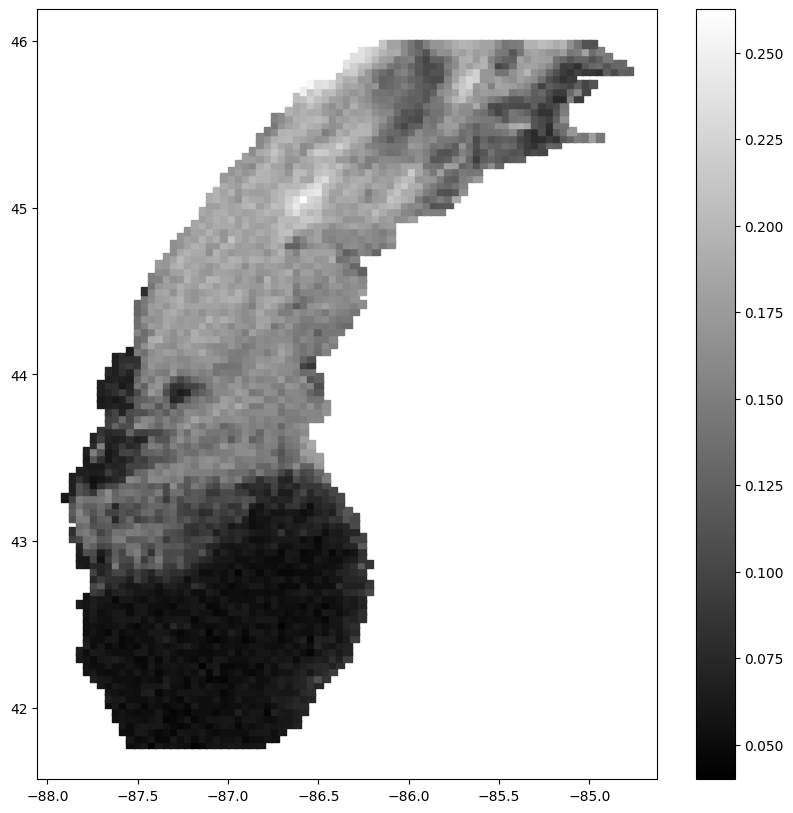

In [36]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_les['Lake_data_1D'][5177]), 'sample', filtered_les.loc[5177]['rain'])

In [37]:
les['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [38]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

0

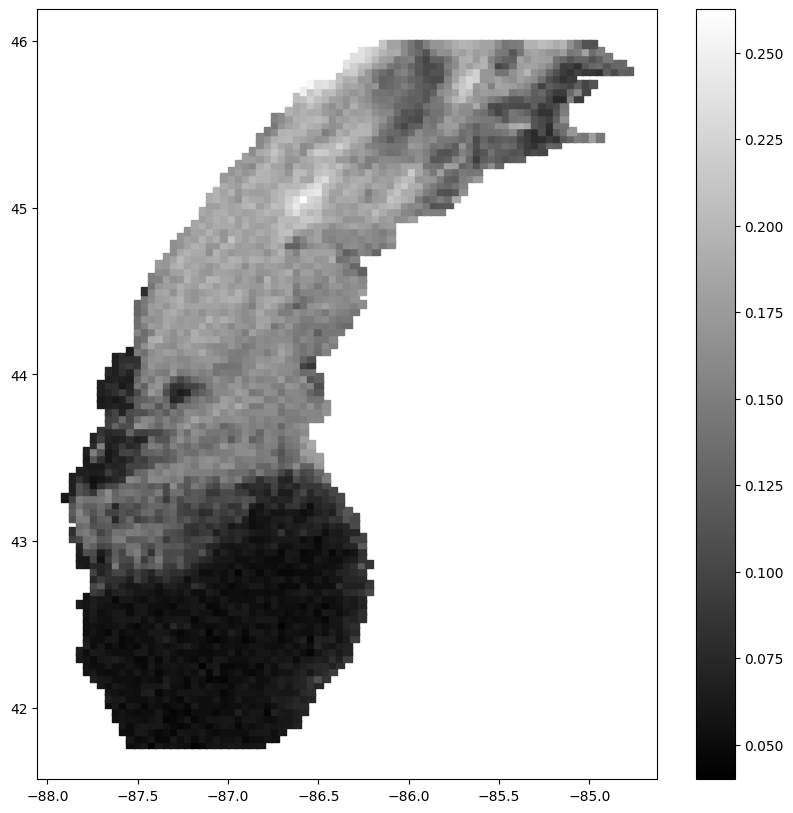

In [39]:
arrays_2_png(lat_lst, lon_lst, 
             [0.0 if el == 'nan' else float(el) for el in filtered_les['Lake_data_1D'][5177].strip('][').split(', ')], 
             'sample',  filtered_les.loc[5177]['rain'])

0

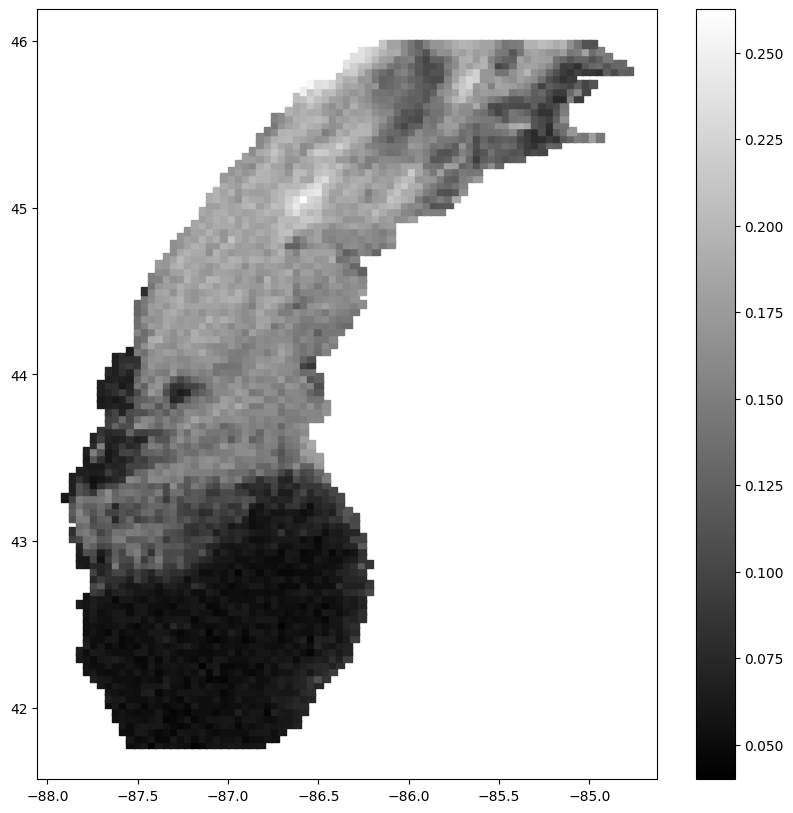

In [40]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][5177]), 
             'sample', filtered_les.loc[5177]['rain'])

In [41]:
# goes11.2008.01.10.1600.v01.nc.png

# Image generation
We will generate 64 $\times$ 64 images for each daytime Cloud frame.

The images are pretty large and take up a lot of memory and processing time for the network, so we resize them into 64 x 64 pixels. Then, we convert the images into grayscale and save them for training. 

The function below removes the colormap and axis, so that clean images can be stored to train the models:

In [42]:
# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name, rainfall):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(r'./Images/lake-michigan-images/' + rainfall + '/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

A small test first:

In [43]:
for i, row in filtered_les.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i), filtered_les.iloc[i]['rain'])
        break

[0.24499999, 0.2025, 0.1925, 0.185, 0.19749999, 0.1925, 0.1875, 0.19, 0.185, 0.1875, 0.2725, 0.17999999, 0.21249999, 0.175, 0.175, 0.17, 0.17, 0.1925, 0.1925, 0.22999999, 0.2075, 0.185, 0.1925, 0.1925, 0.19, 0.19749999, 0.17999999, 0.17999999, 0.18249999, 0.195, 0.1875, 0.17999999, 0.14999999, 0.16, 0.14999999, 0.1375, 0.16749999, 0.33249998, 0.265, 0.3125, 0.235, 0.2025, 0.195, 0.19749999, 0.22999999, 0.205, 0.1925, 0.17999999, 0.17, 0.17999999, 0.1925, 0.205, 0.185, 0.1475, 0.21499999, 0.24, 0.2625, 0.29, 0.2625, 0.295, 0.24249999, 0.28, 0.305, 0.2375, 0.19749999, 0.19749999, 0.195, 0.2025, 0.1875, 0.185, 0.1875, 0.185, 0.22, 0.21, 0.18249999, 0.28, 0.2175, 0.32, 0.295, 0.285, 0.2525, 0.30249998, 0.35999998, 0.255, 0.26749998, 0.315, 0.29999998, 0.4475, 0.3575, 0.21, 0.2325, 0.22749999, 0.1925, 0.19749999, 0.18249999, 0.18249999, 0.1875, 0.16749999, 0.17999999, 0.21249999, 0.19749999, 0.2625, 0.29, 0.3125, 0.2575, 0.2525, 0.285, 0.355, 0.2375, 0.33249998, 0.195, 0.26749998, 0.2575, 0

OK, this works. Let's read in the 1D column and serialize lake Michigan clouds:

In [44]:
from tqdm import tqdm
for i, row in tqdm(les.iterrows()):
    if i == 100:
        break

92it [00:00, 2264.90it/s]


In [45]:
filtered_les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,none
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,10,994.7,1017.7,1017.6,0.0,none
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,none


In [46]:
# from tqdm import tqdm
# for i, row in tqdm(filtered_les.iterrows()):

#     try:
#         #arr = np.array(eval(row.Lake_data_1D))
#         arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
#         arrays_2_png_data(lat_lst, lon_lst, arr, str(i), filtered_les.iloc[i]['rain'])
#     except Exception as e: # If no data is available (fill with zeros)
#         #txt = row.Lake_data_1D
#         #txt = txt.replace('nan', '0')
#         #arr = np.array(eval(txt))
#         print(e)
#         print("oopsie at row:", i)

In [47]:
# from tqdm import tqdm

# batch_size = 100
# num_batches = len(filtered_les) // batch_size + 1

# for batch_num in range(num_batches):
#     start_idx = batch_num * batch_size
#     end_idx = min((batch_num + 1) * batch_size, len(filtered_les))

#     batch_df = filtered_les.iloc[start_idx:end_idx]

#     for i, row in tqdm(batch_df.iterrows()):
#         try:
#             arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
#             arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
#         except Exception as e:
#             print(e)
#             print("Oopsie at row:", i)


In [48]:
from tqdm import tqdm

def row_generator(df):
    for i, row in df.iterrows():
        yield i, row

batch_size = 1000  # Adjust as needed
num_batches = len(filtered_les) // batch_size + 1
gen = row_generator(filtered_les)
batches = []
for batch_num in range(num_batches):
    batch_df = []
    for _ in range(batch_size):
        try:
            i, row = next(gen)
            batch_df.append((i, row))
        except StopIteration:
            break
    batches.append(batch_df)
    
    # for i, row in tqdm(batch_df):
    #     try:
    #         arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
    #         arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
    #     except Exception as e:
    #         print(e)
    #         print("Oopsie at row:", i)


In [49]:
len(batches)

15

## Generated the images in splitted batches to avoid memmory issue

In [50]:
for i, row in tqdm(batches[0]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


In [51]:
for i, row in tqdm(batches[1]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


In [52]:
for i, row in tqdm(batches[2]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


In [53]:
for i, row in tqdm(batches[3]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


In [54]:
for i, row in tqdm(batches[4]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


In [55]:
for i, row in tqdm(batches[5]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:53<00:00,  8.77it/s]


In [56]:
for i, row in tqdm(batches[6]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


In [57]:
for i, row in tqdm(batches[7]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


In [58]:
for i, row in tqdm(batches[8]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


In [59]:
for i, row in tqdm(batches[9]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


In [60]:
for i, row in tqdm(batches[10]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:50<00:00,  9.02it/s]


In [61]:
for i, row in tqdm(batches[11]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:46<00:00,  9.35it/s]


In [62]:
for i, row in tqdm(batches[12]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:51<00:00,  8.95it/s]


In [63]:
for i, row in tqdm(batches[13]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


In [64]:
for i, row in tqdm(batches[14]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████| 951/951 [01:48<00:00,  8.74it/s]


### Plan worked this time system didn't crashed and all images are generated

# Removing the 255-level padding around Lake Michigan
We need to do this *before* we resize the images to 64 $\times$ 64, otherwise we will get artificial aliasing around the lake MIchigan coastline, which will look like spurious Cloud intensity around the coastline!

We know that image #39 is corrupt: all black. It should give us the shape of Lake Michigan!

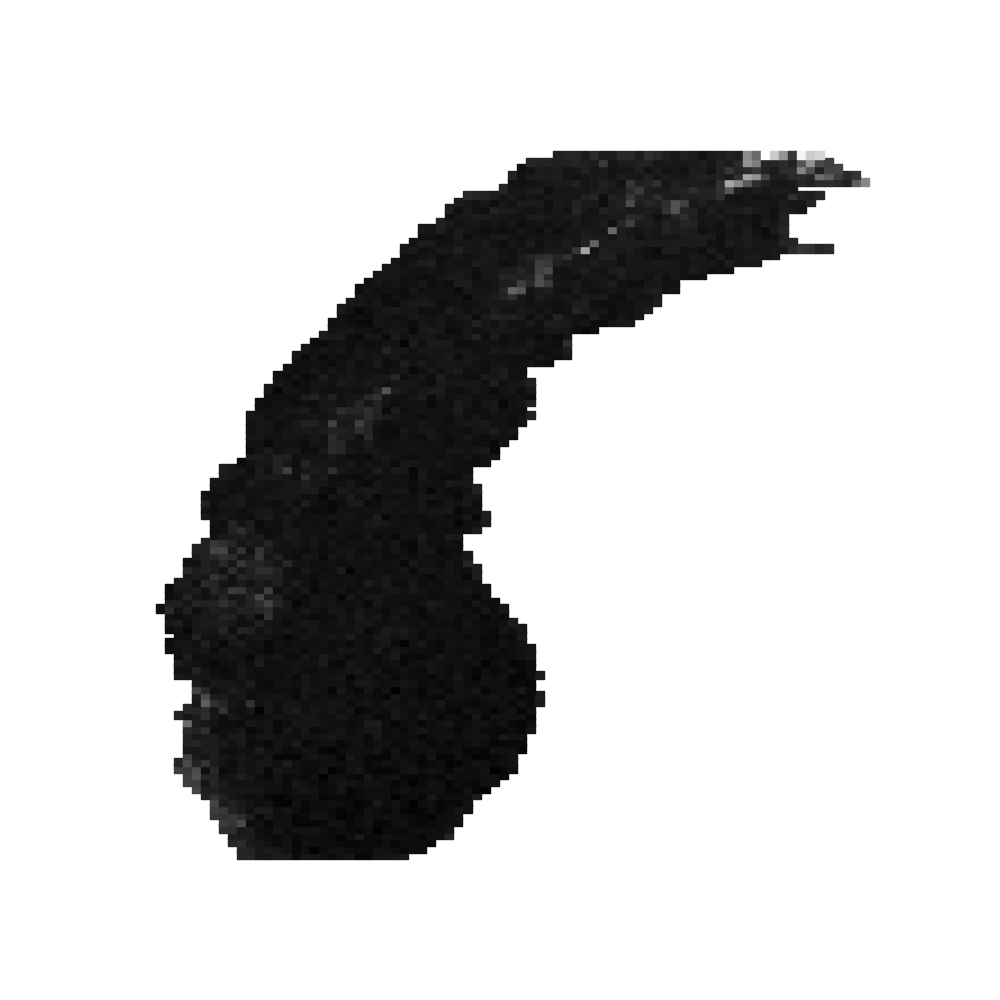

In [65]:
from PIL import Image, ImageOps

img = Image.open('./Images/lake-michigan-images/none/39.png')
img

Let's create a mask that is all ones *over* lake Michigan, and all zeros over land:

In [66]:
#full = np.full(img.size, 255)
img = ImageOps.grayscale(img)
#mask = (full - img).astype(np.uint8)
#mask = (0 < mask).astype(int)
img = np.asarray(img)
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860], dtype=int64),
 array([553, 554, 555, ..., 406, 407, 408], dtype=int64))

In [67]:
(mask * 255)[150, 553], (mask * 255)[860, 408]

(255, 255)

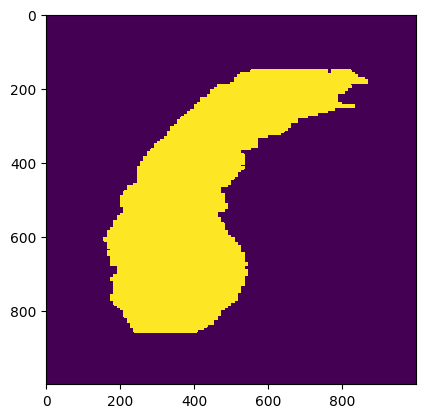

In [68]:
plt.imshow(mask * 255, interpolation='none')
plt.show()

Now let's see what Image #6 should really look like, without the spurious full-intensity over land:

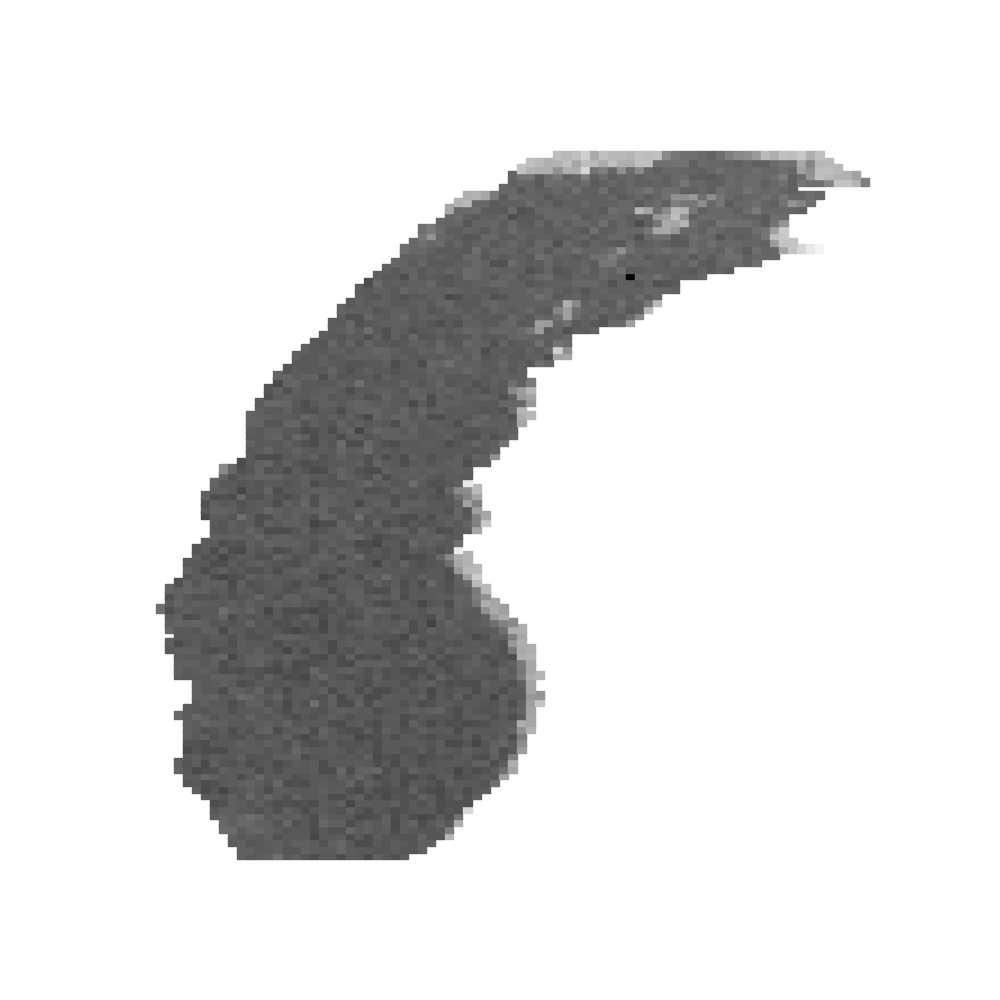

In [69]:
img = Image.open('./Images/lake-michigan-images/none/6.png')
img = ImageOps.grayscale(img)
img

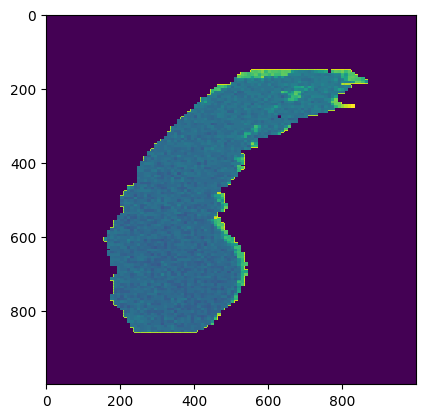

In [70]:
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out outside region
plt.imshow(newimg, interpolation='none')
plt.show()

In [71]:
(newimg)[150, 553], (newimg)[860, 408]

(245, 231)

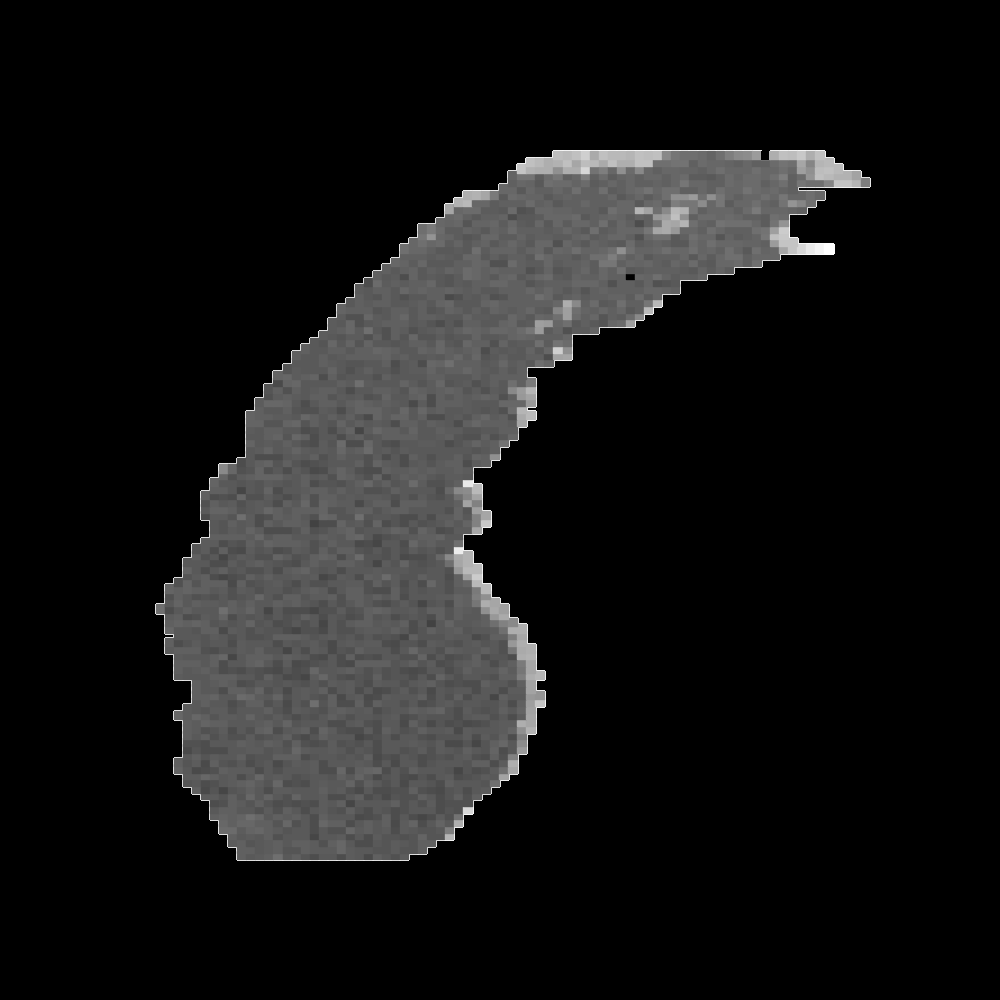

In [72]:
ImageOps.grayscale(Image.fromarray(newimg))

And this is how we save the image above:

In [73]:
ImageOps.grayscale(Image.fromarray(newimg)).save('./Images/lake-michigan-images/none/sample.png')

To combine all ops:

In [74]:
f_img = './Images/lake-michigan-images/none/6.png'
g_img = './Images/lake-michigan-images/sample.png'
img = Image.open(f_img)
img = ImageOps.grayscale(img)
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64))
newimg64.save(g_img)

# Shrinking to 64 $\times$ 64
We now resize images to 64 $\times$ 64 in order to reduce network training memory requirements, with zero intensities on land and avoiding aliasing around the lake border:

In [75]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/none'
g = './Images/lake-michigan-images-64/none'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|██████████| 13891/13891 [05:26<00:00, 42.59it/s]


Error occured because sample is already resized for test purpose, no need to create a copy of sample again in new location

In [76]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/moderate'
g = './Images/lake-michigan-images-64/moderate'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|██████████| 658/658 [00:15<00:00, 41.55it/s]


In [77]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/medium'
g = './Images/lake-michigan-images-64/medium'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|██████████| 397/397 [00:09<00:00, 41.13it/s]


In [78]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/high'
g = './Images/lake-michigan-images-64/high'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|██████████| 6/6 [00:00<00:00, 38.50it/s]


## Creating the combined 64 X 64 lake-michigan-images

In [79]:
import shutil
import os

# List of source folders
source_folders = ['./Images/lake-michigan-images-64/high/', './Images/lake-michigan-images-64/medium/', './Images/lake-michigan-images-64/moderate/',
                 './Images/lake-michigan-images-64/none/']

# Destination folder path
destination_folder = './Images/lake-michigan-images-64-combined/'

# Iterate through each source folder
for source_folder in source_folders:
    # Get a list of all image files in the current source folder
    image_files = [file for file in os.listdir(source_folder) if file.endswith('.png')]
    
    # Copy each image file from the current source folder to the destination folder
    for image_file in image_files:
        source_path = os.path.join(source_folder, image_file)
        destination_path = os.path.join(destination_folder, image_file)
        shutil.copyfile(source_path, destination_path)
